<a href="https://colab.research.google.com/github/castudil/bacteria-multi-label/blob/main/multilabel_bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Used

In [2]:
import os

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Step 1 - OBTAIN

The data used represents the results of numerous applications of mass spectrometry on the bacteria S. Aureus.

The data has been synthesized into blocks of 20 Da, ranging from 2000 to 8000, totalling 300 columns of real non-negative data. There exists 4 special columns which contain the susceptibility of the bacteria to certain antibiotics, which can be S (susceptible) or R (resistant). These 4 columns are the target variables. This turns the problem into a multi-label one, meaning we want to predict multiple variables simultaneously. The target antibiotics are: Oxacillin, Clindamycin, Ceftriaxone, and Fusidic Acid.

We load the dataset.

In [3]:
os.chdir("..")
file = "data/main_s_aureus_bin20_2000_8000Da.csv"

bac = pd.read_csv(file)
bac

,2000,2020,2040,2060,2080,2100,2120,2140,2160,2180,...,7880,7900,7920,7940,7960,7980,Oxacillin,Clindamycin,Ceftriaxone,Fusidic acid
0,920.875000,1169.468085,1028.382979,2045.000000,1352.702128,1244.565217,1349.326087,1641.391304,1647.326087,1285.717391,...,484.625000,379.125000,470.708333,496.125000,494.208333,194.360678,S,S,S,R
1,734.020833,811.297872,850.276596,1287.021277,1023.744681,854.891304,864.739130,1246.673913,1148.369565,1045.847826,...,473.166667,414.708333,413.708333,438.916667,418.739130,235.924043,S,S,S,S
2,93.104167,73.425532,68.957447,65.574468,82.191489,114.630435,138.543478,860.500000,188.500000,109.108696,...,108.541667,138.250000,245.041667,186.625000,134.291667,98.122052,S,S,S,S
3,876.895833,1023.106383,911.595745,1324.063830,1090.872340,1018.586957,1121.782609,1130.739130,1218.913043,1135.195652,...,287.625000,276.375000,227.458333,247.375000,286.565217,118.780199,S,S,S,S
4,269.812500,272.489362,229.787234,249.489362,253.255319,280.434783,290.434783,492.043478,343.282609,290.630435,...,245.041667,206.666667,203.875000,244.375000,242.608696,126.558246,R,S,R,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,1505.437500,1554.770833,1587.446809,3000.914894,2348.914894,1841.369565,1850.217391,2432.446809,1881.622222,1738.804348,...,215.208333,185.708333,189.416667,192.375000,222.708333,86.741818,S,R,S,R
3403,1001.854167,987.617021,1005.765957,1532.212766,1351.765957,1104.489362,1180.130435,1515.478261,1323.804348,1166.260870,...,48.333333,44.541667,31.695652,30.958333,32.916667,18.464676,S,S,S,S
3404,979.645833,998.085106,961.787234,1075.978723,1027.787234,1062.148936,1088.152174,1447.847826,1056.891304,1011.543478,...,154.833333,142.708333,132.391304,126.375000,129.791667,42.110838,S,S,S,S
3405,150.148936,204.520833,187.319149,666.744681,290.021277,239.282609,290.212766,655.195652,339.934783,247.844444,...,45.375000,33.208333,38.166667,40.833333,37.434783,33.178466,S,S,S,S


# Etapa 02 - SCRUB

It's important to validate the integrity of the data.

To do this, the first step taken is to validate how many rows of non-NA data each column contains.

In [3]:
bac.count()

2000            3407
2020            3407
2040            3407
2060            3407
2080            3407
                ... 
7980            3407
Oxacillin       3407
Clindamycin     3407
Ceftriaxone     3407
Fusidic acid    3407
Length: 304, dtype: int64

From this, we can confirm that the dataset does indeed have 304 columns, and that there's 3407 rows in seemingly every column.

---

Next step is to make sure there is no NA data in any of the columns. For this, we can simply use DataFrame methods.

In [4]:
print(bac.isna().sum())
print("\nTotal number of NA data: " + str(bac.isna().sum().sum()))

2000            0
2020            0
2040            0
2060            0
2080            0
               ..
7980            0
Oxacillin       0
Clindamycin     0
Ceftriaxone     0
Fusidic acid    0
Length: 304, dtype: int64

Total number of NA data: 0


From this, it can be concluded that there is no NA data and, therefore, there is no need to do any additional preprocessing in regard to this.

---

Finally, we verify each column is in an appropriate format.

In [5]:
bac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Columns: 304 entries, 2000 to Fusidic acid
dtypes: float64(300), object(4)
memory usage: 7.9+ MB


300 columns are numeric, and 4 are objects.

The 300 numeric columns correspond to the mass spectrum data, while the 4 object columns are the antibiotic resistance data.

To save time, a variable with the name of the antibiotics is defined.

In [6]:
labels = ["Oxacillin", "Clindamycin", "Ceftriaxone", "Fusidic acid"]

For more useful visualization of the data and so that the models don't put more weight into one column over the other, the data is normalized.

In [7]:
#Features are normalized
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(bac.iloc[:, :-len(labels)])

#Features are merged back together with the labels 
bac_normalized = pd.DataFrame(np.column_stack([X_normalized, bac[labels]]))
bac_normalized.columns = bac.columns

To avoid any any biases during the exploration of the data, test data is split from the train data. 
* The splits shall have the data stratified, meaning they will keep the same class ratio as the original dataset.
* The test split shall have a size of 20% of the original dataset (which means the training split will have the remaining 80%).
* To keep consistency between tests, its random_state shall be set to 1.

In [8]:
bac_train, bac_test = train_test_split(bac_normalized, test_size=0.2, random_state=1, stratify=bac_normalized[labels])

For the exploration step, only the train data from the 80-20 split shall be used.

# Step 3 - Explore

## **Individual Antibiotic Analysis**

For our first analysis, we construct a heatmap showing the value distribution for each antibiotic. In other words, how many rows show resistence or susceptibility to each antibiotic.

<Axes: >

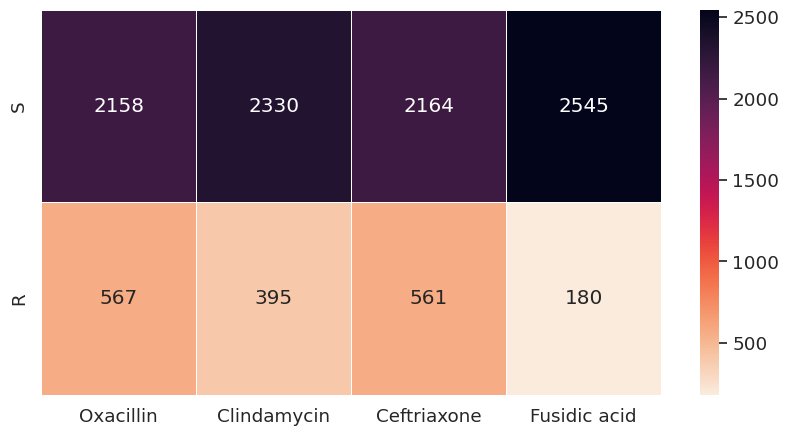

In [9]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set(font_scale=1.2)
sns.heatmap(bac_train[labels].apply(pd.Series.value_counts), annot=True, fmt="d", linewidth=.5, cmap="rocket_r")

From this, we can observe that, in the case of the antibiotics studied, bacteria tend to be susceptible. In other words, the antibiotics will, most of the time, be effective against S. Aureus. This generates a considerable imbalance between the classes

## **Joint Antibiotic Analysis**

Unlike the previous analysis, this time we try to find out how many rows there are for each combination of resistances and display it on a table.

We take the individual susceptibility values to each antibiotic analyzed and combine them, similar to as if they were a single column, consolidating the information found in each of the individual target columns. For example, if the bacteria is resistant to Oxacillin but susceptible to Clindamycin, this would originally be represented in two columns, one with value R and the other with value S respectively. The joint analysis process combines both of these columns, analyzing them as "RS". The same process is then repeated for every other row in the dataset. This is a process that can be applied to any amount of antibiotics, in this case using all four of them.

In [10]:
# We count how many rows there are for each combination of target values.
value_counts = bac_train[labels].value_counts()
df_value_counts = value_counts.rename("Count").to_frame().reset_index()

# We calculate every combination possible, so that they are included in the table even if not present in the dataset.
options = ["S", "R"]
combined = []
for i in range(len(labels)):
    combined.append(options)
combinations = list(itertools.product(*combined))
df_combinations = pd.DataFrame(columns=labels, data=combinations)

# We combine the counts to the list of combinations.
df_combination_count = df_combinations.merge(df_value_counts, how="left").fillna(0).astype({"Count": "int"})
df_combination_count

,Oxacillin,Clindamycin,Ceftriaxone,Fusidic acid,Count
0,S,S,S,S,1843
1,S,S,S,R,88
2,S,S,R,S,0
3,S,S,R,R,0
4,S,R,S,S,214
5,S,R,S,R,13
6,S,R,R,S,0
7,S,R,R,R,0
8,R,S,S,S,6
9,R,S,S,R,0


This table shows us how the problem would be if we went from a multi-label problem, to a multi-class one.

Similar to the previous analysis, we can notice there is a considerable imbalance between the classes, with the majority (SSSS) showing over x100 more rows than the minority (RRRR).

There's also some other things that can be noticed:

* There is only 6 rows in which Oxacillin and Ceftriaxone show different susceptibilities. This implies these are likely very similar antibiotics.
* There are 7 combinations (classes) for which there are no rows.
  * S S R S
  * S S R R
  * S R R S
  * S R R R
  * R S S R
  * R R S S
  * R R S R
* All combinations for which there are no rows share the same thing: Oxacillin and Ceftriaxone have different results to one another.

In [11]:
print(df_combination_count.to_latex(index=False))

\begin{tabular}{llllr}
\toprule
Oxacillin & Clindamycin & Ceftriaxone & Fusidic acid & Count \\
\midrule
S & S & S & S & 1843 \\
S & S & S & R & 88 \\
S & S & R & S & 0 \\
S & S & R & R & 0 \\
S & R & S & S & 214 \\
S & R & S & R & 13 \\
S & R & R & S & 0 \\
S & R & R & R & 0 \\
R & S & S & S & 6 \\
R & S & S & R & 0 \\
R & S & R & S & 330 \\
R & S & R & R & 63 \\
R & R & S & S & 0 \\
R & R & S & R & 0 \\
R & R & R & S & 152 \\
R & R & R & R & 16 \\
\bottomrule
\end{tabular}



---
**Label Correlation**

From the previous table, it was observed that there are very few rowsa in which Oxacillin and Ceftriaxone have different susceptibility values. This implies that, maybe, one of the two is redundant to study. With the goal of confirming this, we shall study the correlation between the values of these antibiotics.

First, we transform the label values to numbers.

In [12]:
bac_numeric = bac_train.replace({'S': 0, 'R': 1})

Now, we calculate the correlation between the labels and display them through a heatmap.

<Axes: >

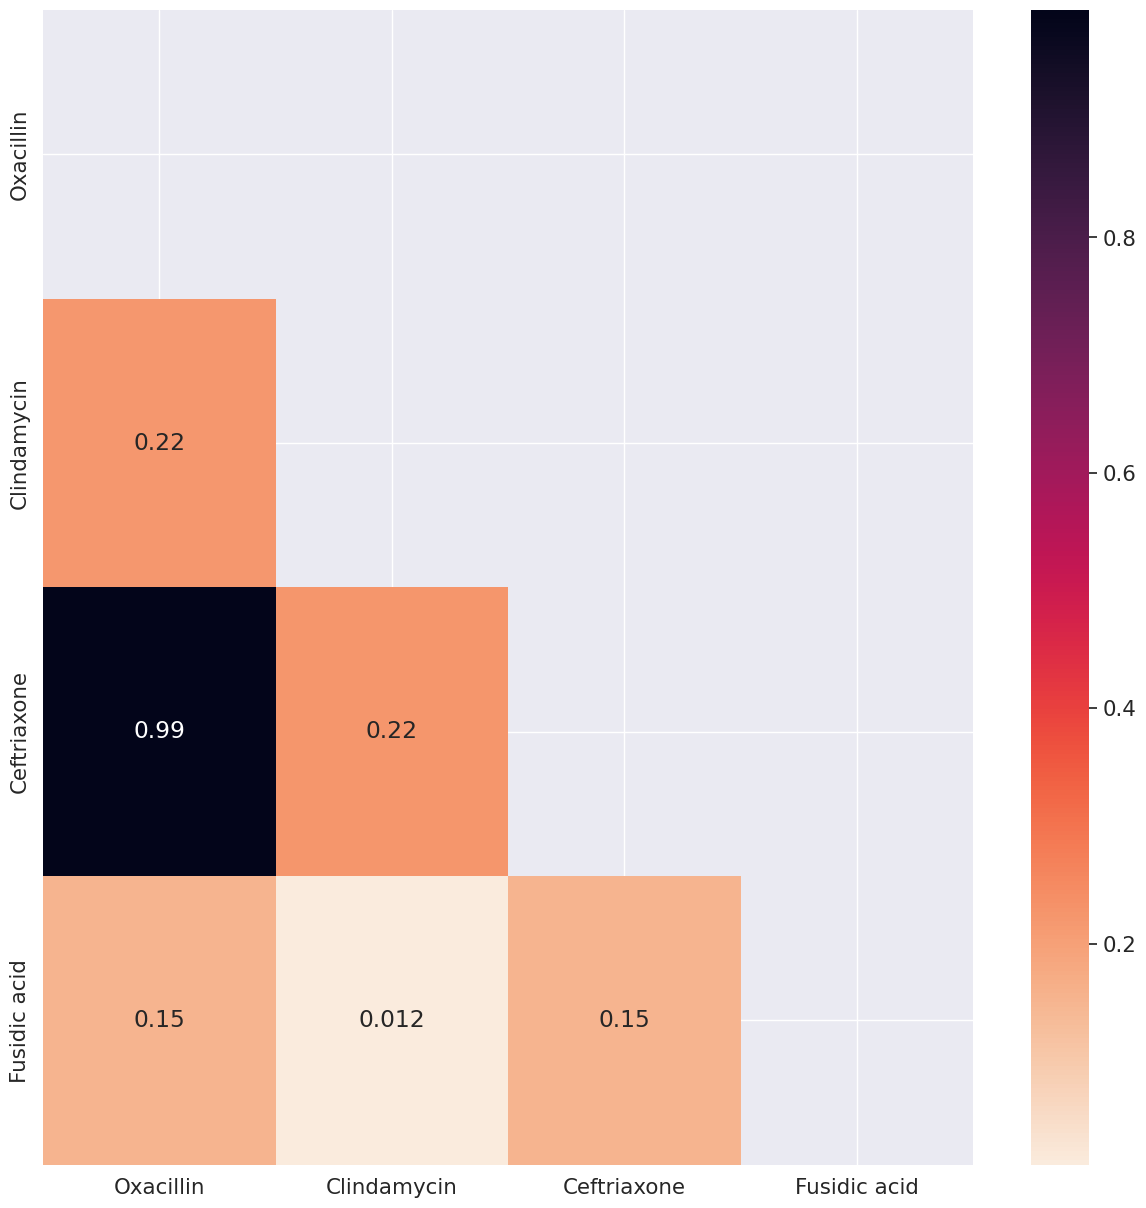

In [13]:
sns.set(rc={'figure.figsize':(15, 15)})
corr = bac_numeric[labels].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(corr, mask=mask, annot=True, cmap="rocket_r")

The generated heatmap shows that Oxacillin and Ceftriaxone have a correlation of 99%. In other words, their values are highly related to one another. None of the other pair of antibiotics show a similarly high correlation. This confirms the previous suspicion: it's redundant to study both Oxacillin and Ceftriaxone at the same time.

Because of this, with the goal of simplifying the problem, Ceftriaxone shall not be studied further. All the following analysis and models constructed will only consider Oxacillin, Clindamycin and Fusidic Acid.

---

For convenience, we define a variable with the names of the antibiotics we will study from this point on and create a copy of the dataset with only the relevant antibiotics.

In [14]:
r_labels = ["Oxacillin", "Clindamycin", "Fusidic acid"]
r_bac = bac_normalized.drop("Ceftriaxone", axis=1)
r_bac

,2000,2020,2040,2060,2080,2100,2120,2140,2160,2180,...,7860,7880,7900,7920,7940,7960,7980,Oxacillin,Clindamycin,Fusidic acid
0,0.016071,0.020026,0.018993,0.037682,0.024458,0.021413,0.024797,0.027058,0.029601,0.023032,...,0.039017,0.04039,0.032561,0.041023,0.043744,0.050512,0.078601,S,S,R
1,0.01276,0.013802,0.01567,0.023627,0.01845,0.014554,0.015704,0.020396,0.020487,0.018686,...,0.039456,0.039429,0.035642,0.036048,0.038667,0.042743,0.095484,S,S,S
2,0.001406,0.000979,0.001093,0.000979,0.001254,0.001523,0.002079,0.013878,0.002954,0.001714,...,0.009496,0.008859,0.011709,0.021326,0.016277,0.013462,0.03951,S,S,S
3,0.015292,0.017483,0.016814,0.024314,0.019676,0.017435,0.020527,0.018439,0.021776,0.020305,...,0.024972,0.023873,0.023666,0.019791,0.021668,0.029137,0.047901,S,S,S
4,0.004536,0.004438,0.004093,0.004389,0.004378,0.004442,0.004929,0.007659,0.005782,0.005003,...,0.019944,0.020303,0.017632,0.017733,0.021402,0.024612,0.051061,R,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,0.026427,0.026722,0.029423,0.055406,0.042653,0.031918,0.034195,0.04041,0.03388,0.031242,...,0.018461,0.017802,0.015817,0.016471,0.016788,0.022563,0.034888,S,R,R
3403,0.017506,0.016866,0.018571,0.028174,0.024441,0.018947,0.021622,0.024933,0.023692,0.020868,...,0.003245,0.003811,0.003596,0.002705,0.002463,0.003026,0.007154,S,S,S
3404,0.017112,0.017048,0.01775,0.019714,0.018524,0.018202,0.019896,0.023792,0.018816,0.018065,...,0.010533,0.01274,0.012095,0.011494,0.01093,0.012998,0.016759,S,S,S
3405,0.002416,0.003257,0.003301,0.012126,0.00505,0.003718,0.004924,0.010413,0.00572,0.004228,...,0.003398,0.003563,0.002615,0.003269,0.003339,0.003491,0.013131,S,S,S


The removal of one of the labels is something that would alter the stratification of the data. Due to this, before continuing with the analysis, the original data is split one more time, now only taking into account the 3 labels selected. We repeat the process previously taken to split the data. Other than the changes to the dataset, the same parameters as the previous split are used.

In [15]:
r_bac_train, r_bac_test = train_test_split(r_bac, test_size=0.2, random_state=1, stratify=r_bac[r_labels])

We save these splits so that other notebooks can use them

In [16]:
r_bac_train.to_csv("3_label/splits/train.csv", index=False, mode='w')
r_bac_test.to_csv("3_label/splits/test.csv", index=False, mode='w')

Same as before, for the rest of the exploration step, only the train data shall be used.

In [17]:
r_bac = r_bac_train

In [18]:
r_bac

,2000,2020,2040,2060,2080,2100,2120,2140,2160,2180,...,7860,7880,7900,7920,7940,7960,7980,Oxacillin,Clindamycin,Fusidic acid
2799,0.04552,0.049164,0.053732,0.103799,0.070313,0.054133,0.066685,0.062658,0.065464,0.052958,...,0.01303,0.014085,0.013747,0.013751,0.017801,0.019805,0.016569,S,S,S
1891,0.017259,0.017404,0.018424,0.021564,0.021515,0.017156,0.018783,0.024013,0.021183,0.020315,...,0.030503,0.031433,0.029932,0.028772,0.031634,0.031223,0.070219,S,S,S
555,0.004456,0.004988,0.005678,0.012892,0.008272,0.005309,0.007186,0.007899,0.007782,0.006989,...,0.02798,0.030444,0.027396,0.030451,0.031686,0.039274,0.092733,S,S,S
1951,0.087679,0.079606,0.080376,0.099183,0.088755,0.07599,0.080818,0.072312,0.075789,0.078015,...,0.025271,0.025498,0.024893,0.024923,0.023928,0.028272,0.039272,S,S,S
1057,0.002474,0.002419,0.002358,0.004563,0.004108,0.002871,0.002792,0.003716,0.003722,0.003371,...,0.014546,0.014997,0.013014,0.013827,0.014606,0.018225,0.042739,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.014471,0.014261,0.014812,0.02428,0.017555,0.014864,0.016927,0.022291,0.015765,0.013412,...,0.026568,0.028946,0.027226,0.0294,0.031105,0.035675,0.071416,S,S,S
1679,0.05132,0.04327,0.042688,0.047761,0.04418,0.041507,0.045532,0.052566,0.043973,0.044534,...,0.051332,0.052892,0.051383,0.044976,0.044261,0.055749,0.119627,S,S,S
2386,0.027629,0.026645,0.029737,0.05711,0.03929,0.03454,0.042135,0.042975,0.03642,0.030301,...,0.003987,0.003996,0.003625,0.003666,0.002803,0.004356,0.006031,S,S,S
2733,0.00535,0.006803,0.006776,0.017303,0.009075,0.006464,0.009227,0.012376,0.010396,0.006687,...,0.027414,0.031705,0.027158,0.02661,0.032736,0.038164,0.105793,R,S,S


Having simplified the problem, we now once again look at the amount of rows there are for each class.

In [19]:
value_counts = r_bac[r_labels].value_counts()
df_value_counts = value_counts.rename("Count").to_frame().reset_index()

options = ["S", "R"]
combined = [options, options, options]
combinations = list(itertools.product(*combined))
df_combinations = pd.DataFrame(columns=r_labels, data=combinations)

df_combination_count = df_combinations.merge(df_value_counts, how="left").fillna(0).astype({"Count": "int"})
df_combination_count

,Oxacillin,Clindamycin,Fusidic acid,Count
0,S,S,S,1843
1,S,S,R,88
2,S,R,S,214
3,S,R,R,13
4,R,S,S,336
5,R,S,R,63
6,R,R,S,152
7,R,R,R,16


We can see that the removal of Ceftriaxone not only helps reduce the amount of classes to worry about (making the problem less complex), but also makes it so we don't have any classes without rows.

In [20]:
print(df_combination_count.to_latex(index=False))

\begin{tabular}{lllr}
\toprule
Oxacillin & Clindamycin & Fusidic acid & Count \\
\midrule
S & S & S & 1843 \\
S & S & R & 88 \\
S & R & S & 214 \\
S & R & R & 13 \\
R & S & S & 336 \\
R & S & R & 63 \\
R & R & S & 152 \\
R & R & R & 16 \\
\bottomrule
\end{tabular}



## **Distribution of values for each block of Da**

One possible way to check if there's any observable visual patterns in the distribution of the data is through the visualization of the mean and the confidence interval of each Da block.

For this, certain tweaks to the dataset are required: the Da blocks must be values instead of columns.

In [21]:
meltdata = r_bac.melt(r_labels, var_name='Da', value_name='Value')
meltdata["Da"] = meltdata["Da"].astype(str).astype(int)
meltdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817500 entries, 0 to 817499
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Oxacillin     817500 non-null  object
 1   Clindamycin   817500 non-null  object
 2   Fusidic acid  817500 non-null  object
 3   Da            817500 non-null  int64 
 4   Value         817500 non-null  object
dtypes: int64(1), object(4)
memory usage: 31.2+ MB


In [22]:
linewidth = 4
label_size = 28
axis_tick_size = 28
legend_size = '24'
y_label_format = '{:,.3f}'
palette = sns.color_palette("tab10")[:2**len(r_labels)]
sns.set(font_scale=1)

With this transformation, the next step is to make a lineplot for each antibiotic, differentiating the susceptible and resistant rows through its legend; blue for susceptible ones, orange for resistant ones.

In [23]:
def one_antibiotic_lineplot(i):
    fig, axes = plt.subplots(1, 1, figsize=(30, 20))
    
    sns.set(font_scale = 2)
    line = sns.lineplot(ax=axes, data=meltdata, x="Da", y="Value", hue=r_labels[i], 
                            palette={"S": "C0", "R": "C1"}, linewidth=linewidth)
    line.set(xticks=np.arange(2000, 8001, 400))
    line.set_xlabel("Da", fontsize=label_size)
    line.set_ylabel("Value", fontsize=label_size)

    line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
    ticks_loc = axes.get_yticks()
    axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

    plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
    plt.setp(line.get_legend().get_title(), fontsize=legend_size) 
    axes.margins(x=0.005)


**Oxacillin**

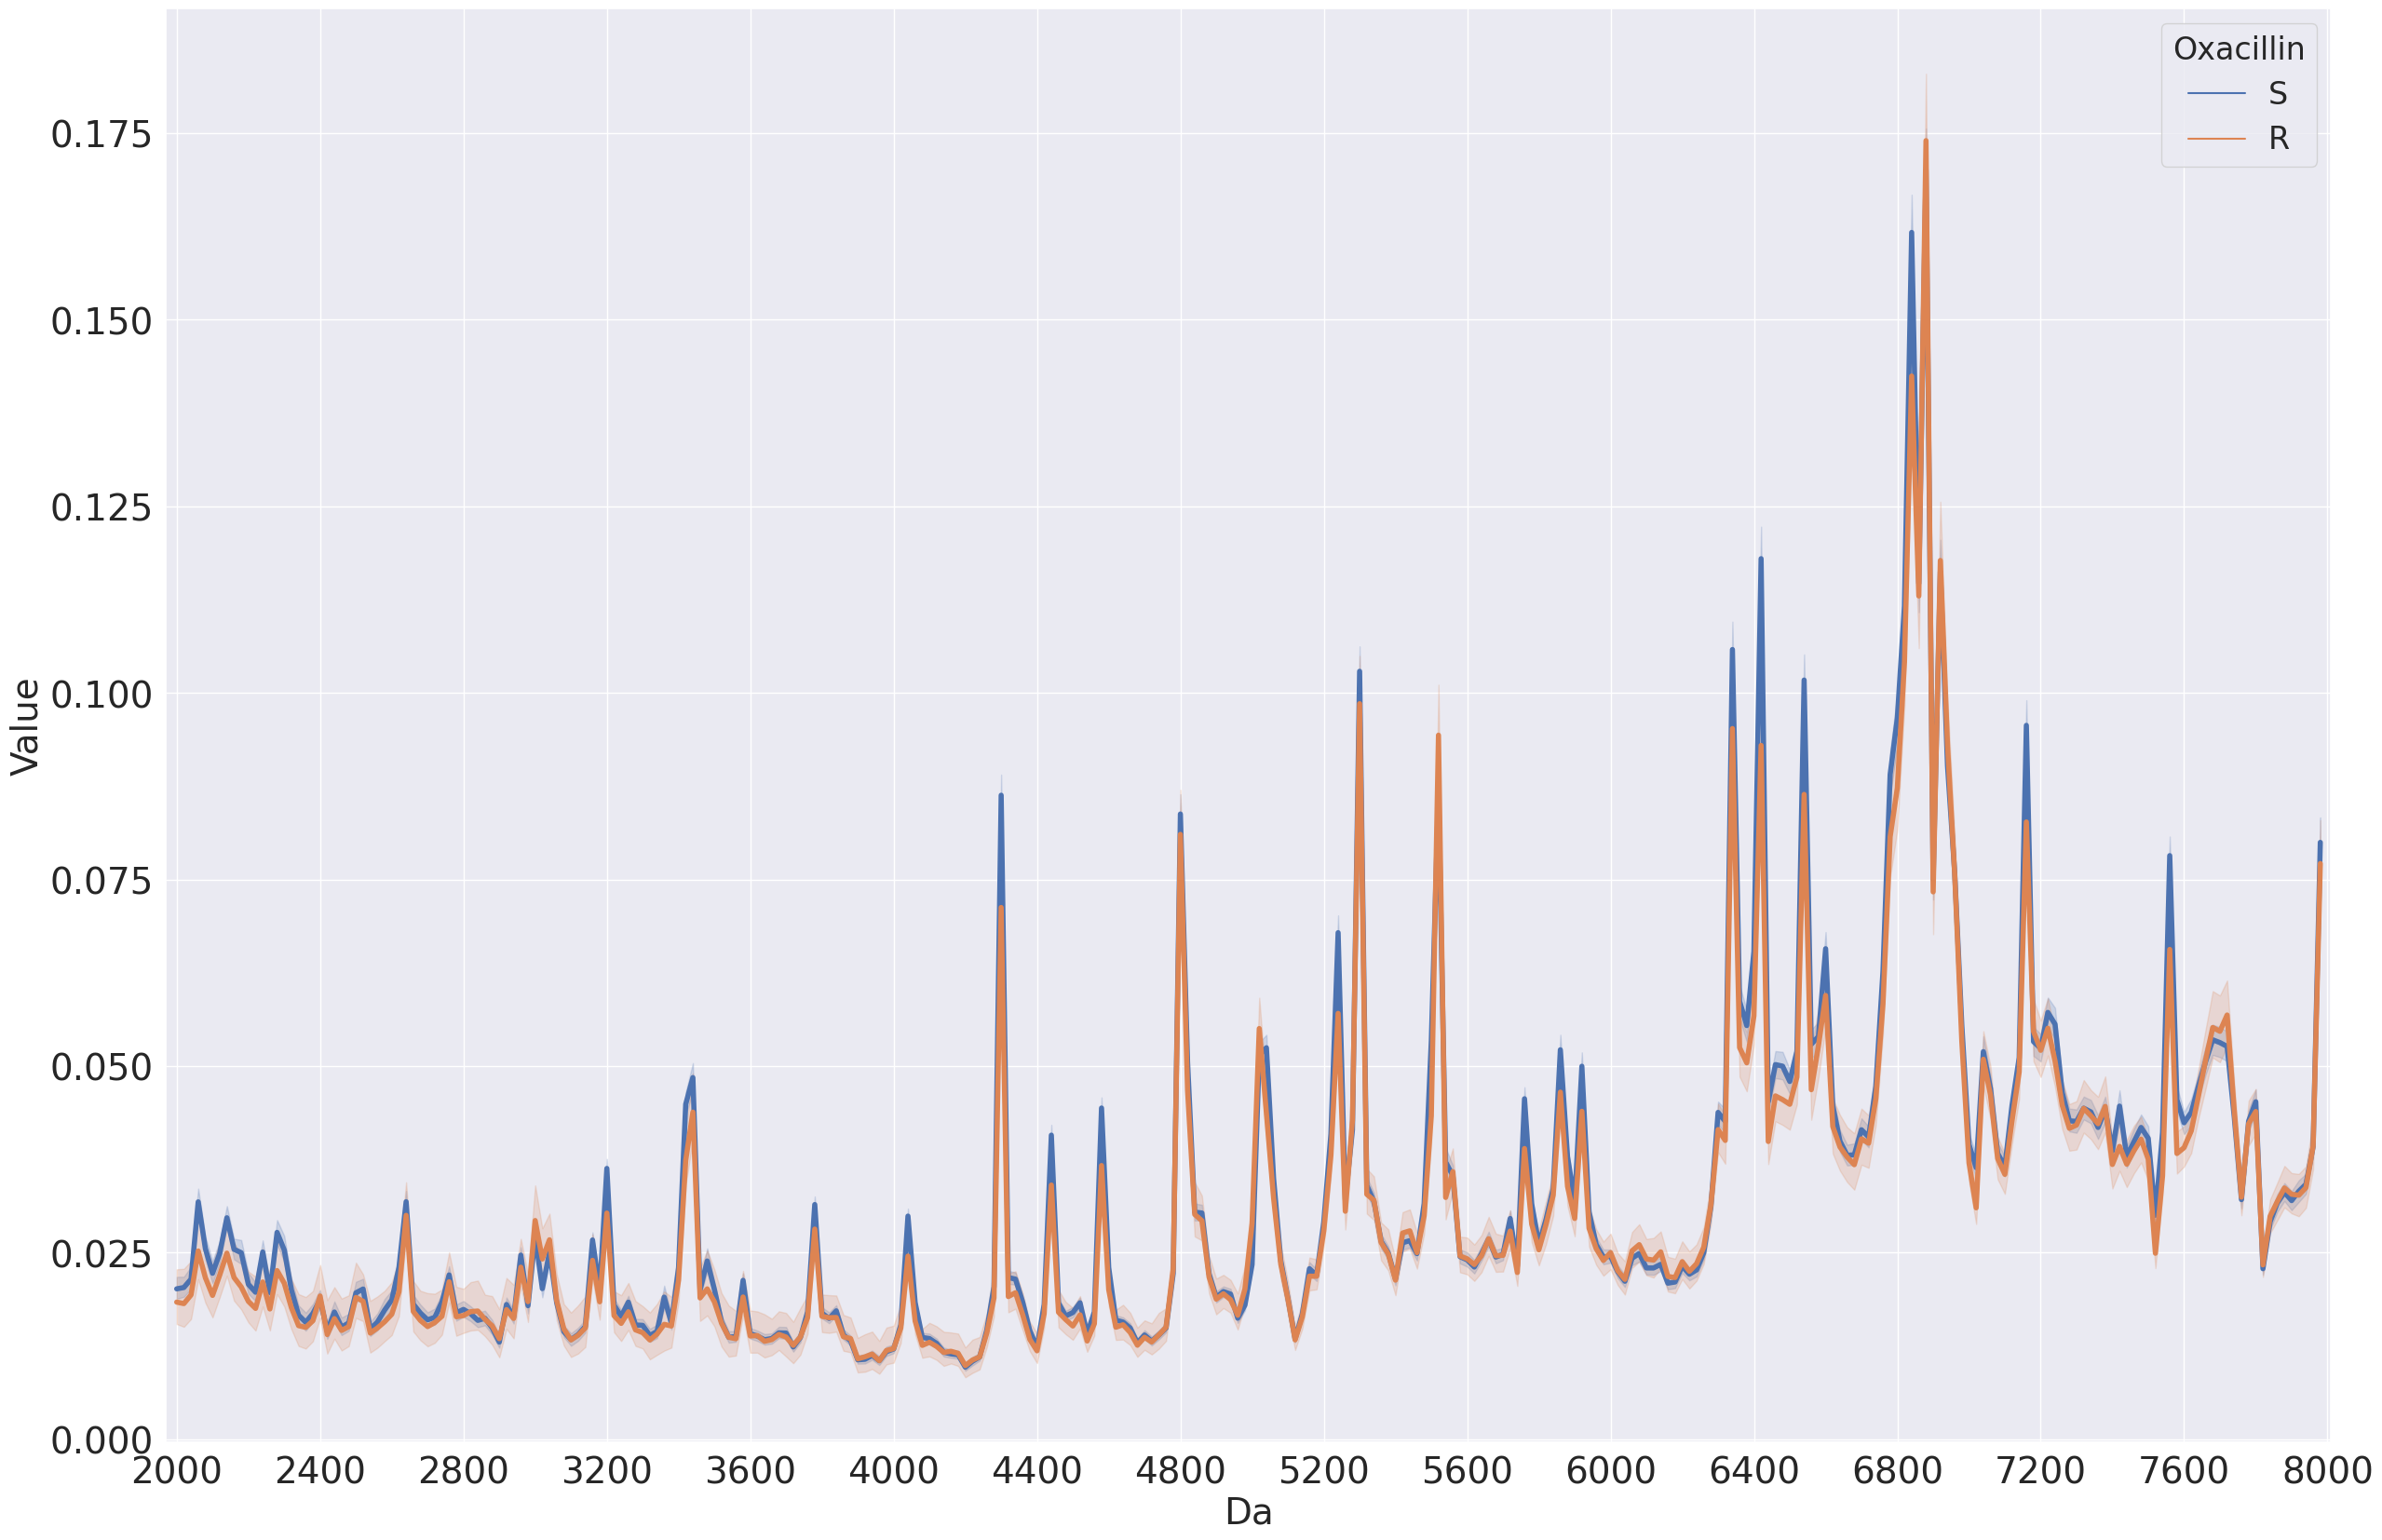

In [24]:
one_antibiotic_lineplot(0)

**Clindamycin**

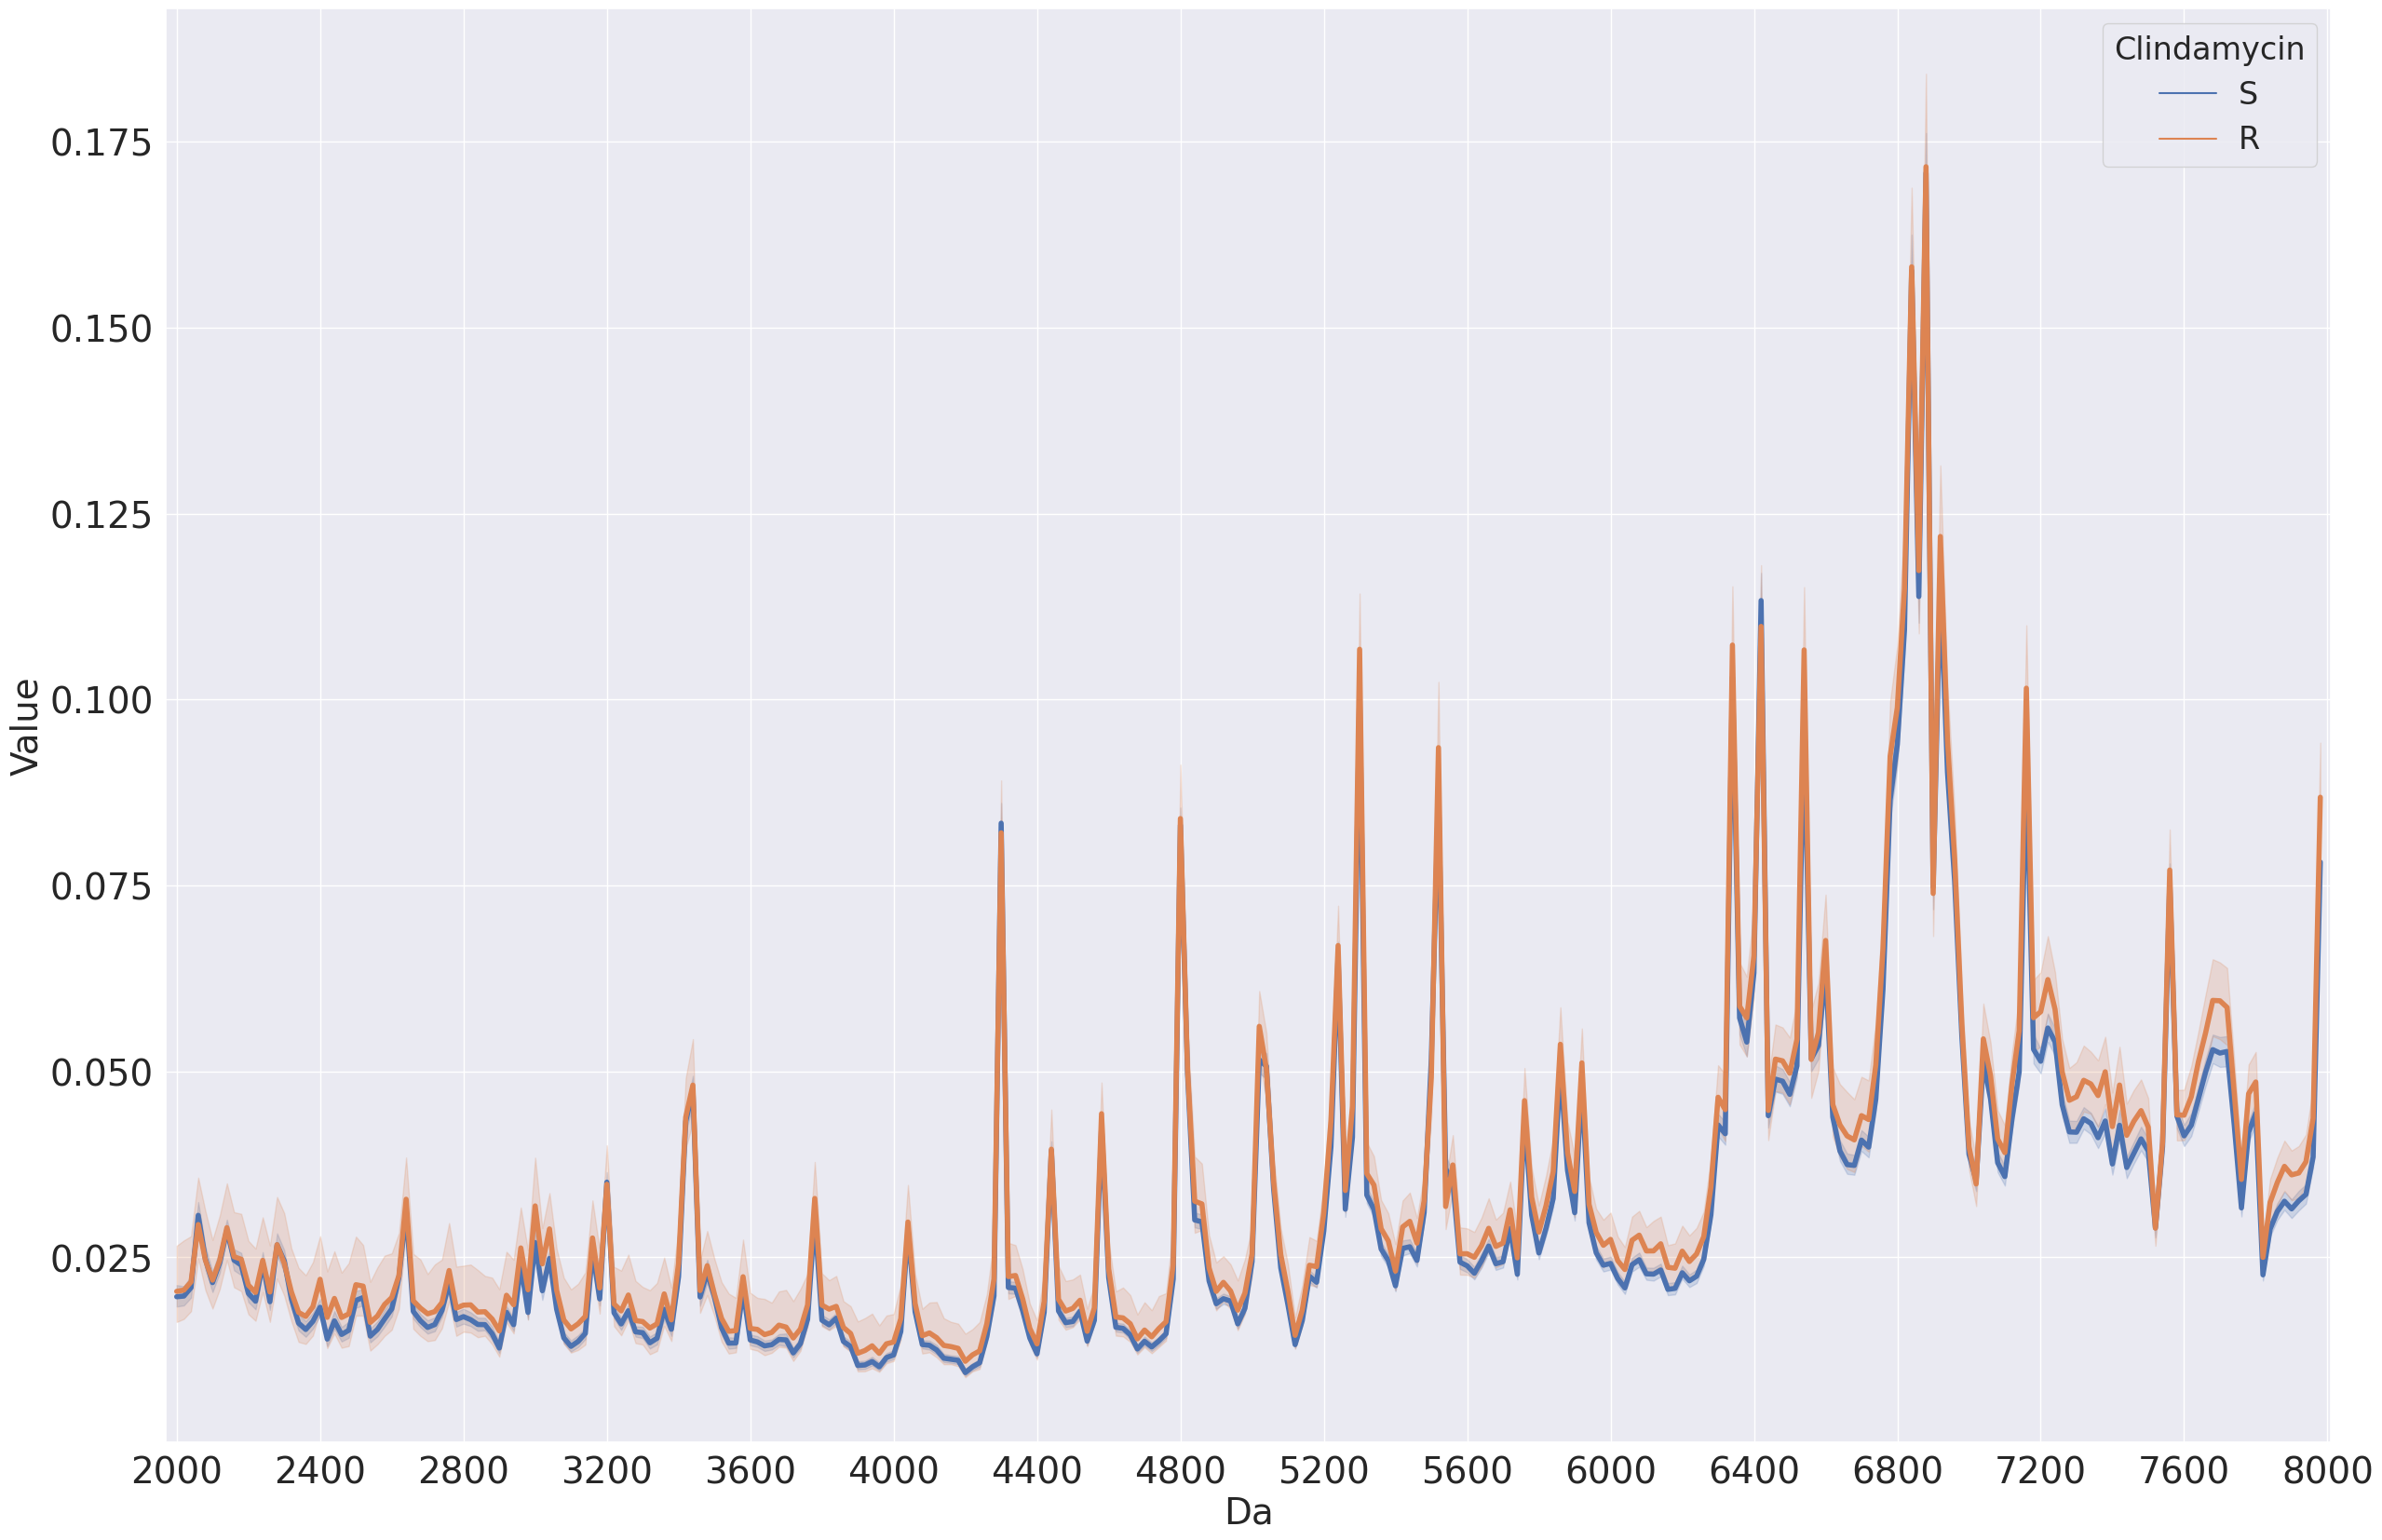

In [25]:
one_antibiotic_lineplot(1)

**Fusidic Acid**

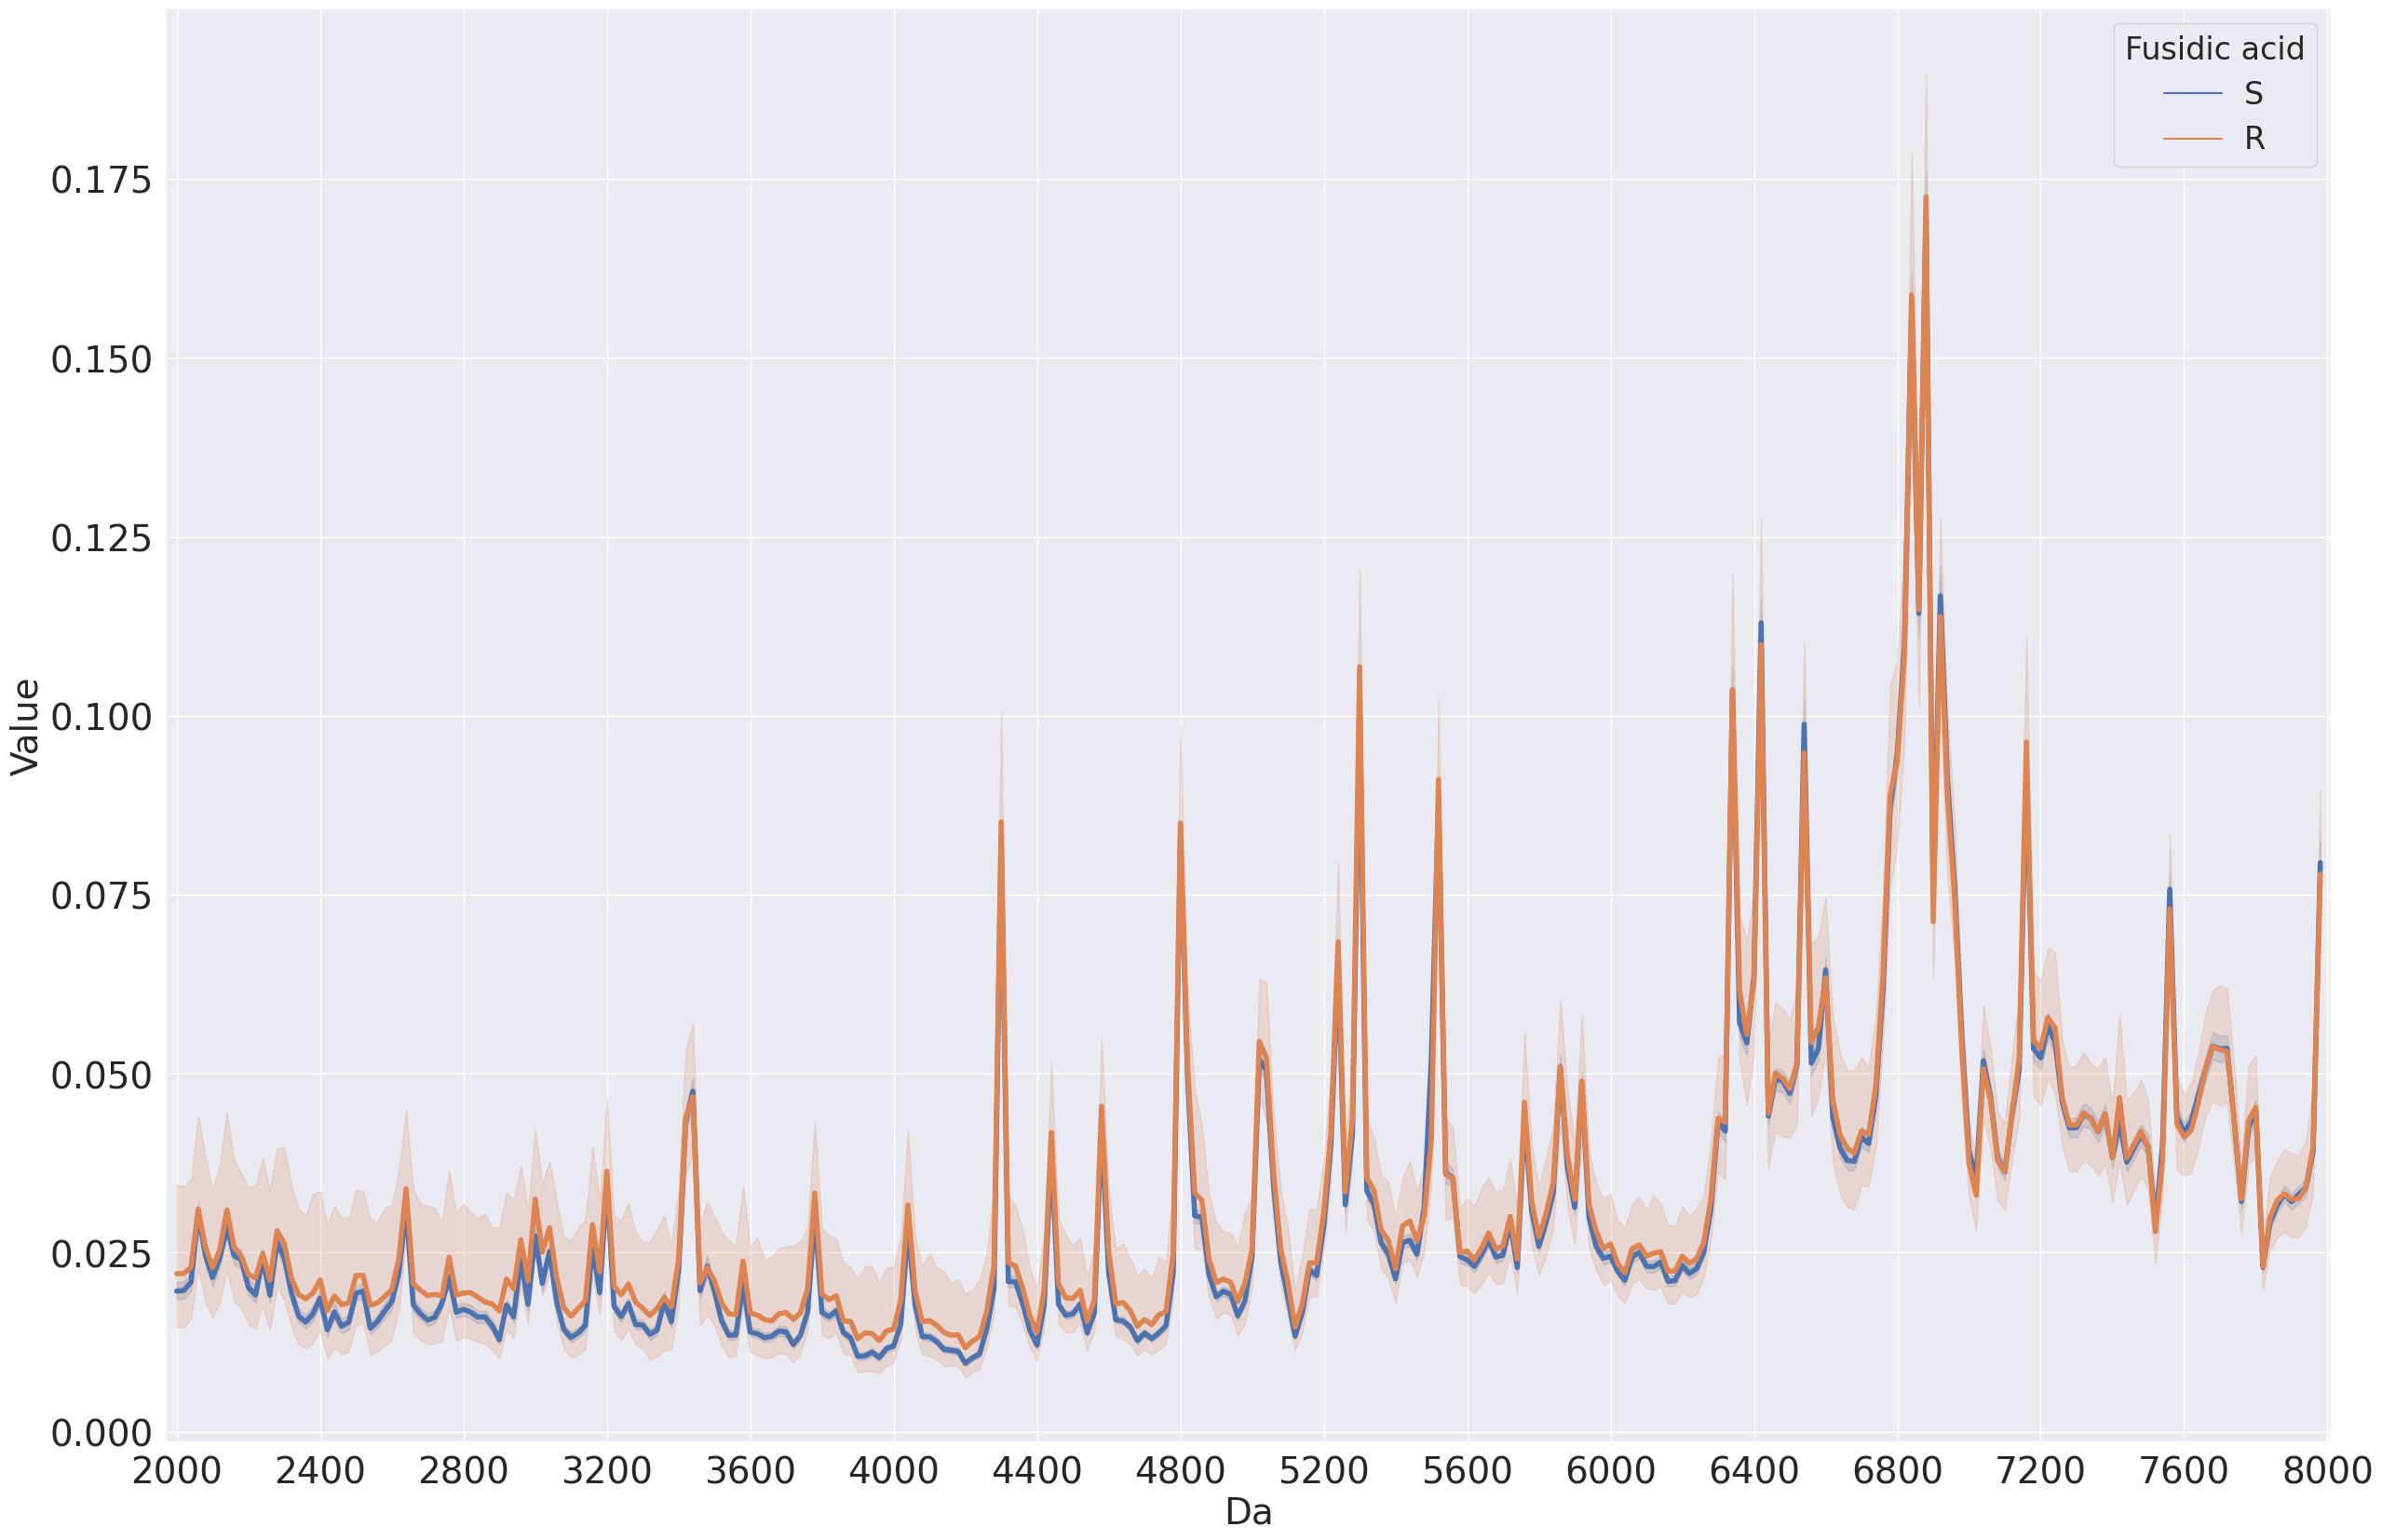

In [26]:
one_antibiotic_lineplot(2)

* For all antibiotics, the mean values of each class are very close to each other, with their confidence intervals overlapping at points.
* Of the three antibiotics, Clindamycin and Fusidic Acid show the bigger confidence intervals, particularly in its resistant rows. This means that the values of the resistant rows of this antibiotic show high variance.
---

Now, we repeat the same experiment but, instead of looking at each antibiotic separately, we join them together as if it were a multi-class problem.

For this, we need to create a new column with the joint labels to our previous transformed data.


In [27]:
meltdata_lps = meltdata
meltdata_lps["Class"] = meltdata[r_labels].agg(''.join, axis=1)
meltdata_lps["Class"] = meltdata_lps["Class"].astype(str)
meltdata_lps

,Oxacillin,Clindamycin,Fusidic acid,Da,Value,Class
0,S,S,S,2000,0.04552,SSS
1,S,S,S,2000,0.017259,SSS
2,S,S,S,2000,0.004456,SSS
3,S,S,S,2000,0.087679,SSS
4,S,S,S,2000,0.002474,SSS
...,...,...,...,...,...,...
817495,S,S,S,7980,0.071416,SSS
817496,S,S,S,7980,0.119627,SSS
817497,S,S,S,7980,0.006031,SSS
817498,R,S,S,7980,0.105793,RSS


Now, same as we did previously, we construct a lineplot with the transformed data, with the legend representing each class (combination of susceptibility/resistence to the antibiotics).

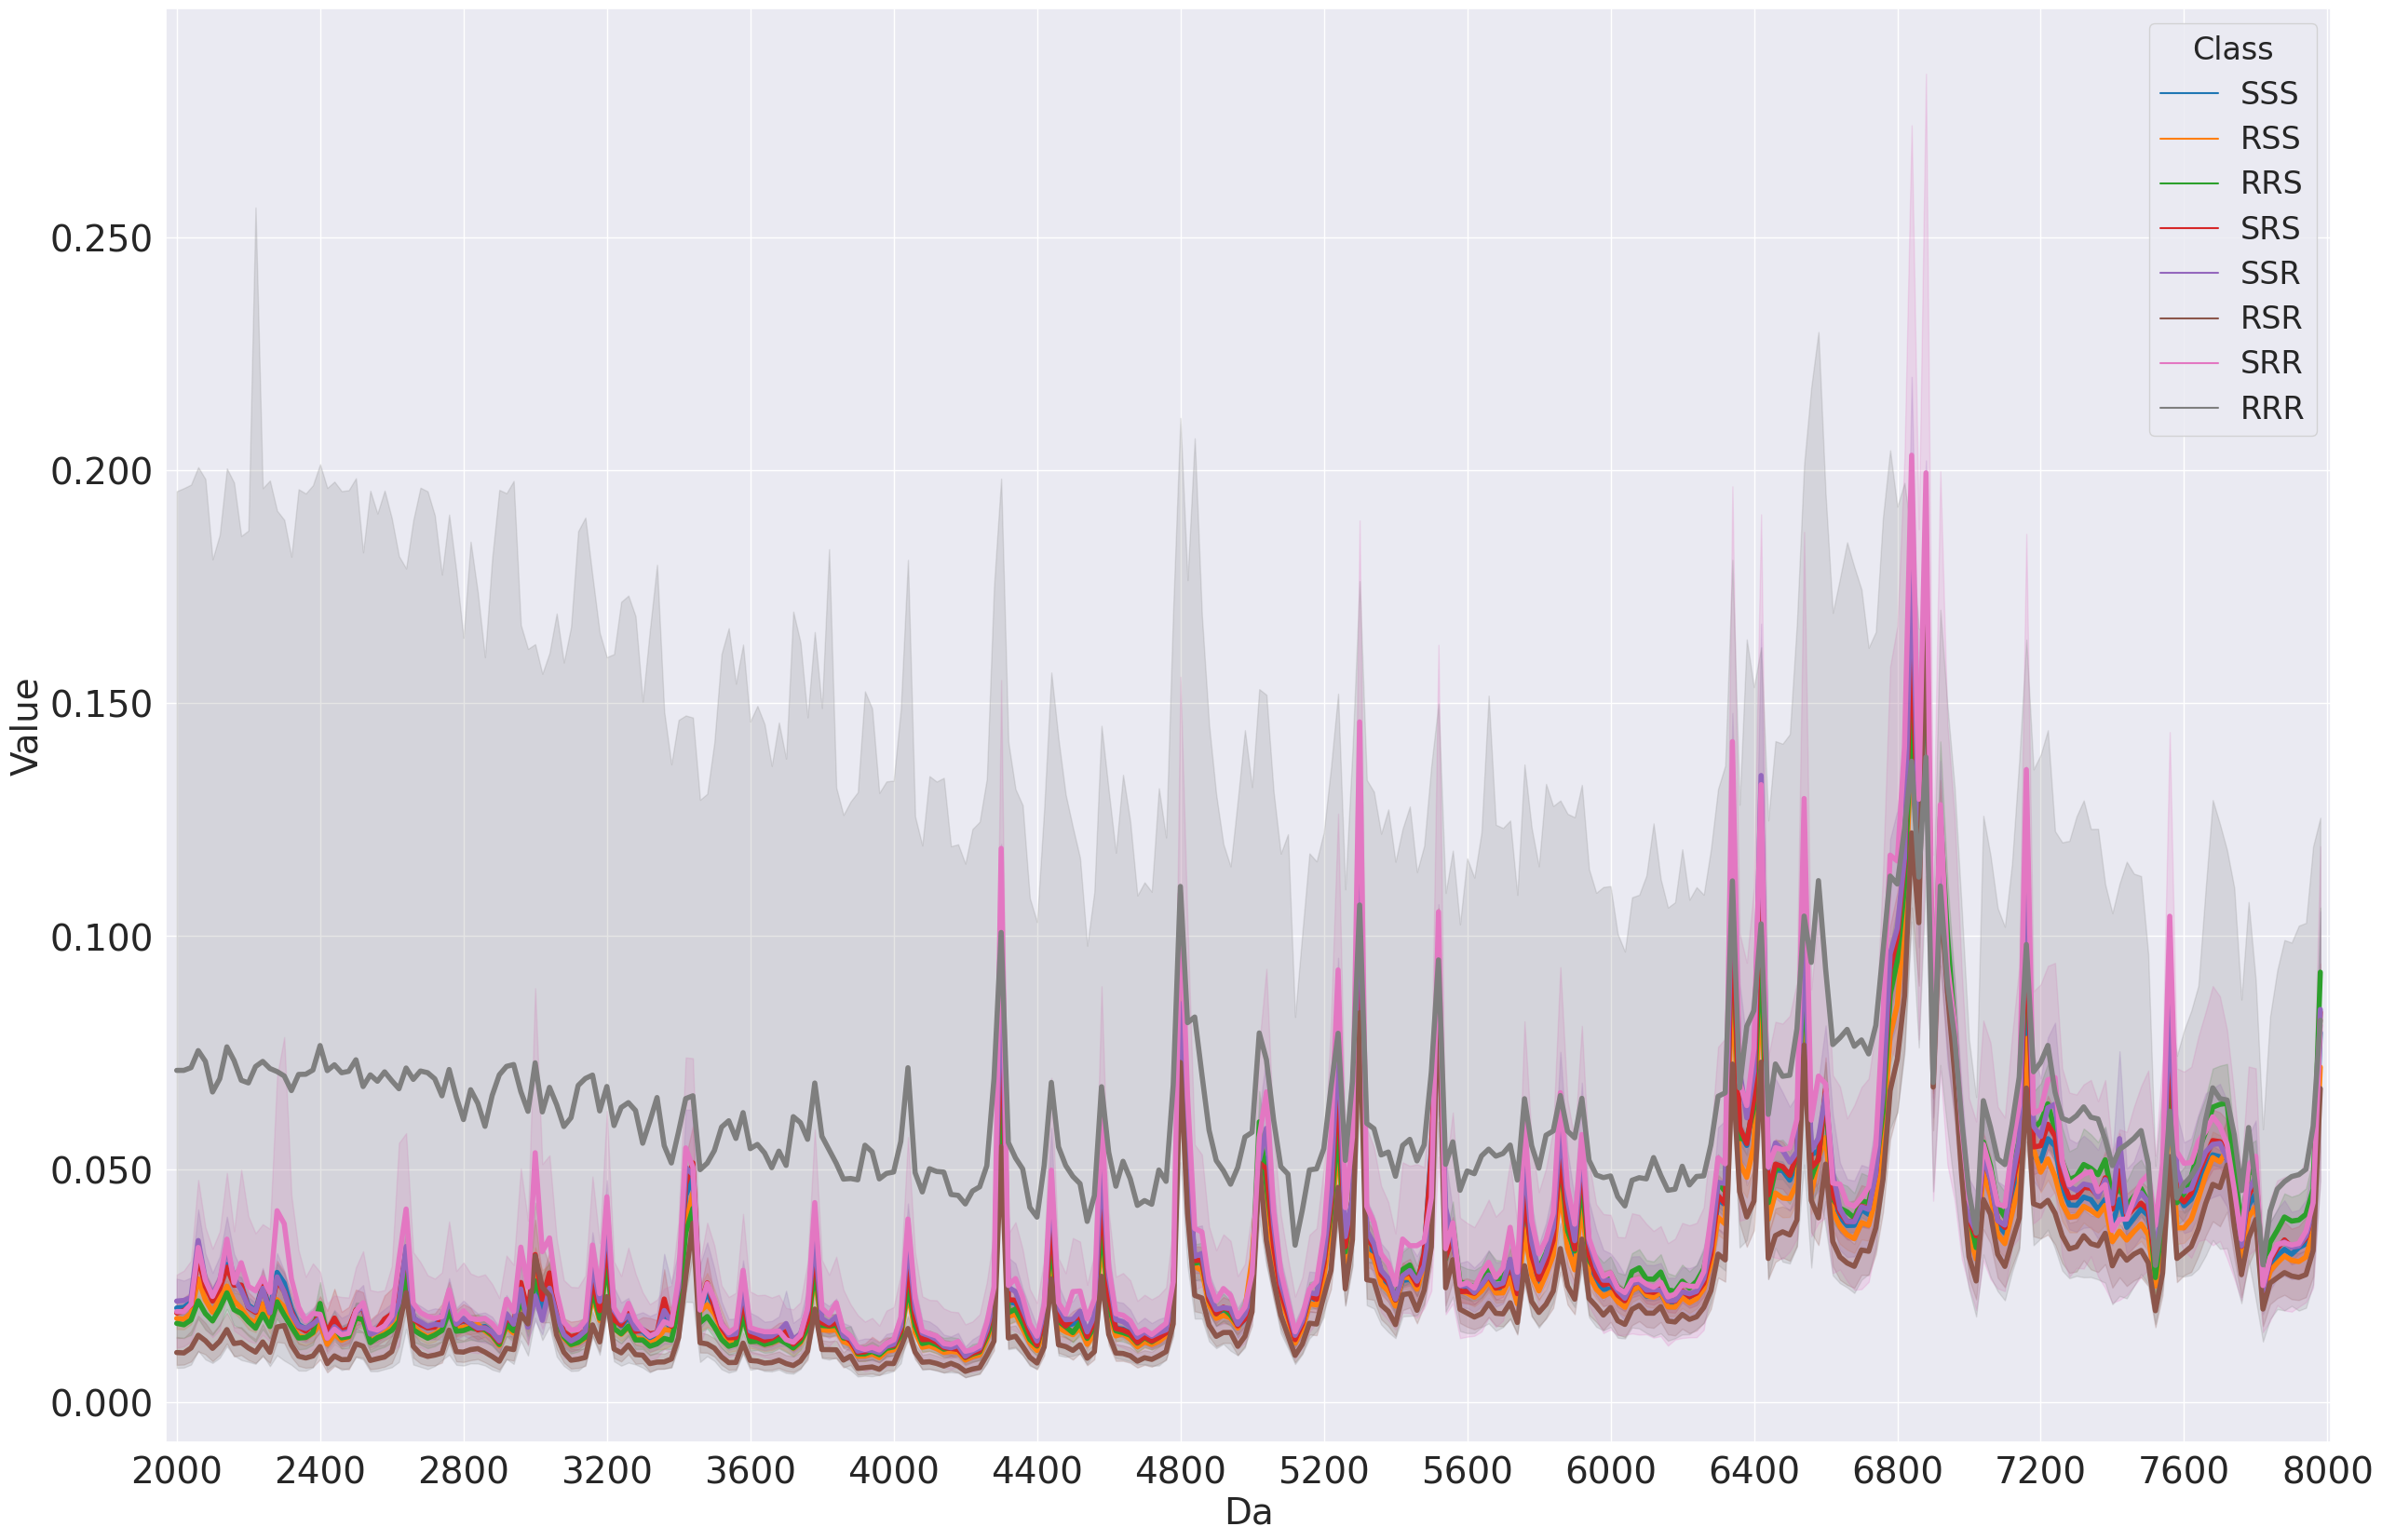

In [28]:
fig, axes = plt.subplots(figsize=(30, 20))

line = sns.lineplot(data=meltdata_lps, x="Da", y="Value", hue="Class", linewidth=linewidth, palette=palette)
line.set(xticks=np.arange(2000, 8001, 400))
line.set_xlabel("Da", fontsize=label_size)
line.set_ylabel("Value", fontsize=label_size)

line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
ticks_loc = axes.get_yticks()
axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
plt.setp(line.get_legend().get_title(), fontsize=legend_size) 

axes.margins(x=0.005)

Once again, we can observe that the mean values of each class are very close to one another.

Additionally, RRR shows a broad confidence interval, an indicator that it will probably be difficult to predict correctly.

## **Scatter Plots**

One of the most convenient ways to observe how the rows group together is through the use of scatter plots. However, the dataset contains 300 columns and visualizing on a Scatter Plot would prove difficult.

To achieve this, the data has to be transformed and its dimensions reduced.

First, we separate the labels from the features and condense the multiple labels into a single one by combining the columns together.

In [29]:
y_lps = pd.DataFrame()
y_lps["Class"] = r_bac[r_labels].agg(''.join, axis=1)
y_lps["Class"] = y_lps["Class"].astype(str)
y_lps

,Class
2799,SSS
1891,SSS
555,SSS
1951,SSS
1057,SSS
...,...
1489,SSS
1679,SSS
2386,SSS
2733,RSS


We convert the produced classes into numbers, so that models can handle them properly.
To do this, we use a Label Encoder.

In [30]:
lc = LabelEncoder()
lc.fit(y_lps.values.ravel())
y_lps = lc.transform(y_lps.values.ravel())
y_lps

array([7, 7, 7, ..., 7, 3, 3])

When required, we can check which class corresponds to each number by doing an inverse transform.

In [31]:
for i in range(2**len(r_labels)):
    print(str(i)+":", lc.inverse_transform([i]))

0: ['RRR']
1: ['RRS']
2: ['RSR']
3: ['RSS']
4: ['SRR']
5: ['SRS']
6: ['SSR']
7: ['SSS']


Now, we separate the features from the labels.

In [32]:
X = r_bac.iloc[:, :-len(r_labels)]
X

,2000,2020,2040,2060,2080,2100,2120,2140,2160,2180,...,7800,7820,7840,7860,7880,7900,7920,7940,7960,7980
2799,0.04552,0.049164,0.053732,0.103799,0.070313,0.054133,0.066685,0.062658,0.065464,0.052958,...,0.01538,0.008802,0.011562,0.01303,0.014085,0.013747,0.013751,0.017801,0.019805,0.016569
1891,0.017259,0.017404,0.018424,0.021564,0.021515,0.017156,0.018783,0.024013,0.021183,0.020315,...,0.058418,0.023025,0.025611,0.030503,0.031433,0.029932,0.028772,0.031634,0.031223,0.070219
555,0.004456,0.004988,0.005678,0.012892,0.008272,0.005309,0.007186,0.007899,0.007782,0.006989,...,0.035325,0.018731,0.025138,0.02798,0.030444,0.027396,0.030451,0.031686,0.039274,0.092733
1951,0.087679,0.079606,0.080376,0.099183,0.088755,0.07599,0.080818,0.072312,0.075789,0.078015,...,0.039326,0.020837,0.023787,0.025271,0.025498,0.024893,0.024923,0.023928,0.028272,0.039272
1057,0.002474,0.002419,0.002358,0.004563,0.004108,0.002871,0.002792,0.003716,0.003722,0.003371,...,0.027848,0.011605,0.011982,0.014546,0.014997,0.013014,0.013827,0.014606,0.018225,0.042739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.014471,0.014261,0.014812,0.02428,0.017555,0.014864,0.016927,0.022291,0.015765,0.013412,...,0.028849,0.016822,0.026557,0.026568,0.028946,0.027226,0.0294,0.031105,0.035675,0.071416
1679,0.05132,0.04327,0.042688,0.047761,0.04418,0.041507,0.045532,0.052566,0.043973,0.044534,...,0.119703,0.050316,0.050151,0.051332,0.052892,0.051383,0.044976,0.044261,0.055749,0.119627
2386,0.027629,0.026645,0.029737,0.05711,0.03929,0.03454,0.042135,0.042975,0.03642,0.030301,...,0.006143,0.003367,0.002995,0.003987,0.003996,0.003625,0.003666,0.002803,0.004356,0.006031
2733,0.00535,0.006803,0.006776,0.017303,0.009075,0.006464,0.009227,0.012376,0.010396,0.006687,...,0.04643,0.020137,0.027494,0.027414,0.031705,0.027158,0.02661,0.032736,0.038164,0.105793


### **PCA**
The first method used to reduce the dimensions of the data is PCA (Principal Component Analysis).

Through this, we extract the top 2 components with the highest variance. This way, while we lose some information, we can create a 2D scatter plot.

In [33]:
pca = PCA(n_components=2, random_state=0)
pca.fit(X)
X_pca = pca.transform(X)

Having fit the PCA, the 2 components with the highest variance are obtained.

In [34]:
X_pca

array([[-0.10735028,  0.15524481],
       [-0.04070581, -0.01119421],
       [-0.11528455, -0.09412244],
       ...,
       [-0.35073093,  0.15656756],
       [ 0.08657344, -0.24817245],
       [-0.11645063, -0.01244395]])

In [35]:
print("Variance of each column:", pca.explained_variance_ratio_)
print("Total:", pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

Variance of each column: [0.66543196 0.14436496]
Total: 0.8097969204197537


It can be observed that these columns contain 80% fo the variance of the data.

These two columns are used to make the PCA scatter plot.

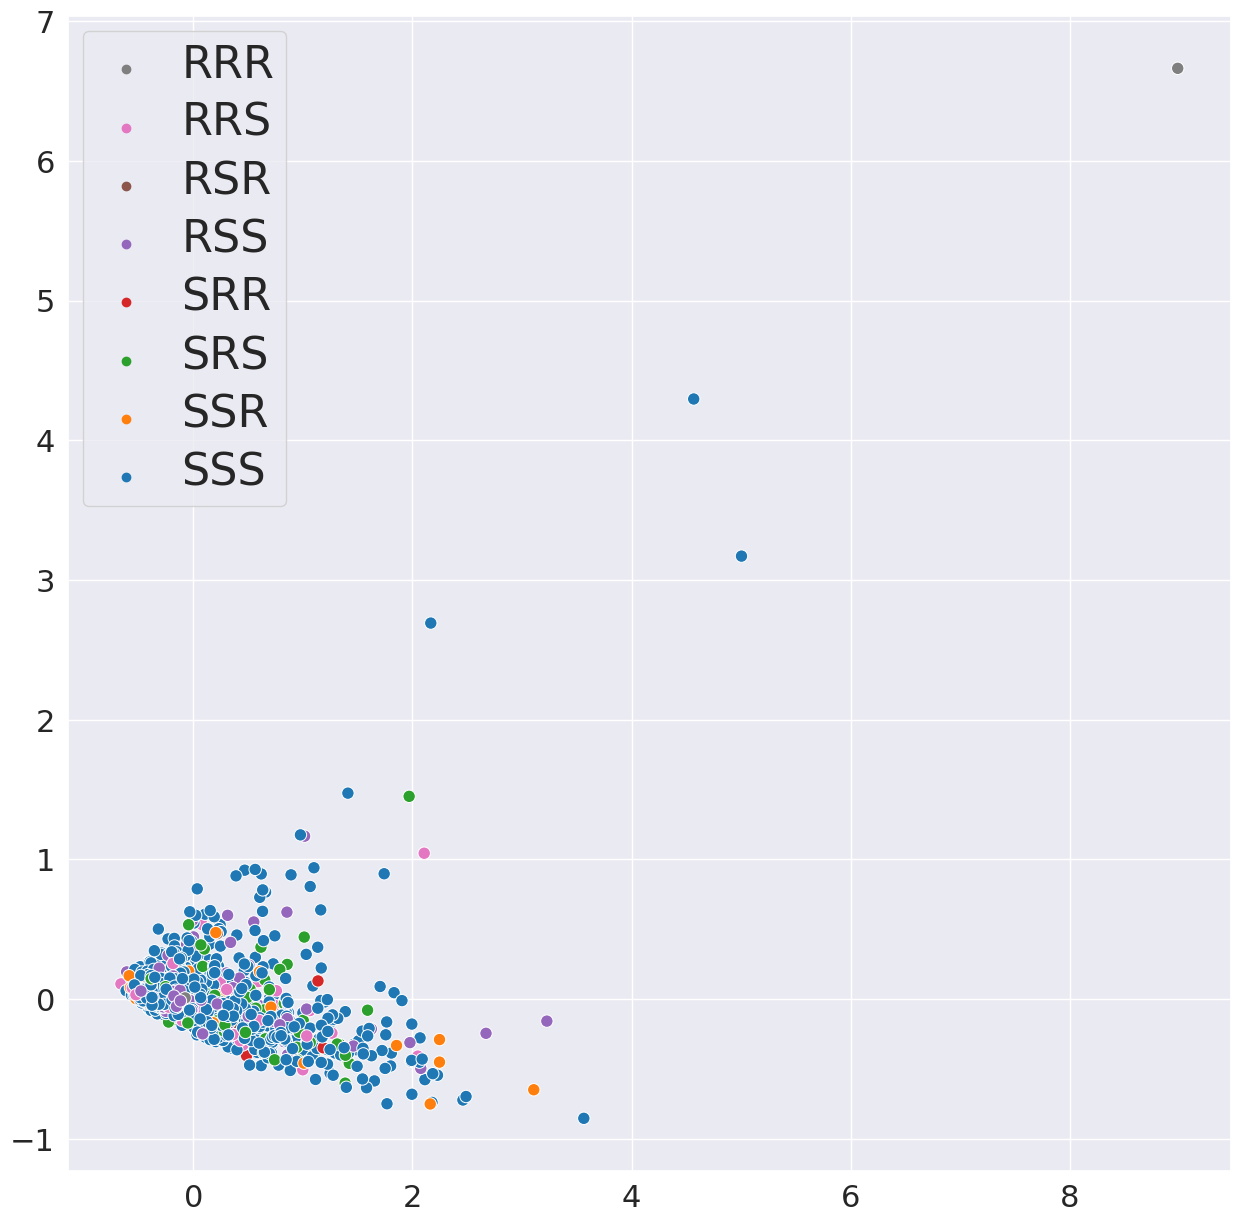

In [36]:
fig, axes = plt.subplots(figsize=(10, 10))

s = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_lps, s=80, palette=palette[::-1])

plt.setp(s.get_legend().get_texts(), fontsize="16") 
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.01))

for t, l in zip(s.legend_.texts, lc.inverse_transform(range(2**len(r_labels)))):
    t.set_text(l)

The results of the PCA show a big problem: All the classes are grouped together, without any easily discernable pattern amongst them.

Additionally, there's a a small number of instances far apart from any other. In other words, there's outliers that could possibly affect models built, as well as the visualizations that were previously built.

These instances shall be removed.

All instances that have a value above 2 in their second component shall be treated as outliers. So that these can be removed from the training data set, the index of these outliers is exracted from the PCA array.

In [37]:
samples_to_remove = []
for i in range((X_pca[:, 1].size)):
    if X_pca[i, 1] > 2:
        samples_to_remove.append(i)
samples_to_remove

[682, 1661, 1688, 2692]

Having the list of indexes to remove, they are removed from the train data set.

In [38]:
r_bac_cleaned = r_bac.drop(index=r_bac.iloc[samples_to_remove].index.tolist(), axis=0)
r_bac_cleaned

,2000,2020,2040,2060,2080,2100,2120,2140,2160,2180,...,7860,7880,7900,7920,7940,7960,7980,Oxacillin,Clindamycin,Fusidic acid
2799,0.04552,0.049164,0.053732,0.103799,0.070313,0.054133,0.066685,0.062658,0.065464,0.052958,...,0.01303,0.014085,0.013747,0.013751,0.017801,0.019805,0.016569,S,S,S
1891,0.017259,0.017404,0.018424,0.021564,0.021515,0.017156,0.018783,0.024013,0.021183,0.020315,...,0.030503,0.031433,0.029932,0.028772,0.031634,0.031223,0.070219,S,S,S
555,0.004456,0.004988,0.005678,0.012892,0.008272,0.005309,0.007186,0.007899,0.007782,0.006989,...,0.02798,0.030444,0.027396,0.030451,0.031686,0.039274,0.092733,S,S,S
1951,0.087679,0.079606,0.080376,0.099183,0.088755,0.07599,0.080818,0.072312,0.075789,0.078015,...,0.025271,0.025498,0.024893,0.024923,0.023928,0.028272,0.039272,S,S,S
1057,0.002474,0.002419,0.002358,0.004563,0.004108,0.002871,0.002792,0.003716,0.003722,0.003371,...,0.014546,0.014997,0.013014,0.013827,0.014606,0.018225,0.042739,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.014471,0.014261,0.014812,0.02428,0.017555,0.014864,0.016927,0.022291,0.015765,0.013412,...,0.026568,0.028946,0.027226,0.0294,0.031105,0.035675,0.071416,S,S,S
1679,0.05132,0.04327,0.042688,0.047761,0.04418,0.041507,0.045532,0.052566,0.043973,0.044534,...,0.051332,0.052892,0.051383,0.044976,0.044261,0.055749,0.119627,S,S,S
2386,0.027629,0.026645,0.029737,0.05711,0.03929,0.03454,0.042135,0.042975,0.03642,0.030301,...,0.003987,0.003996,0.003625,0.003666,0.002803,0.004356,0.006031,S,S,S
2733,0.00535,0.006803,0.006776,0.017303,0.009075,0.006464,0.009227,0.012376,0.010396,0.006687,...,0.027414,0.031705,0.027158,0.02661,0.032736,0.038164,0.105793,R,S,S


Finally, the cleaned version of the data set is saved for later use.

In [39]:
r_bac_cleaned.to_csv("3_label/splits/train.csv", index=False, mode='w')

The removal of multiple instances means that several of the previous graphics displayed would change. So that said changes can be visualized, most of the exploration steps displayed in this notebook shall be repeated.

Continued in: **3_label_step_3_part_2.ipynb**